<a href="https://colab.research.google.com/github/TharakaAthukorala/Machine-Learning/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import pandas as pd

In [199]:
data = pd.read_csv('winequality-red.csv', delimiter=';')
# data = pd.read_csv('https://github.com/TharakaAthukorala/Machine-Learning/blob/main/winequality-red.csv', delimiter=';', skiprows=0, low_memory=False)

In [200]:
data.shape

(1599, 12)

In [201]:
# data = normalize(data, axis=0)

In [202]:
X = data.values[:, 0:11]
y = data.values[:, 11]
m = len(y)

In [203]:
def normalize(X):
  """
    Normalizes the features(input variables) in X.

    Parameters
    ----------
    X : n dimensional array (matrix), shape (n_samples, n_features)
        Features(input varibale) to be normalized.

    Returns
    -------
    X_norm : n dimensional array (matrix), shape (n_samples, n_features)
        A normalized version of X.
    mu : n dimensional array (matrix), shape (n_features,)
        The mean value.
    sigma : n dimensional array (matrix), shape (n_features,)
        The standard deviation.
  """
  #Note here we need mean of indivdual column here, hence axis = 0
  mu = np.mean(X, axis = 0)  
  # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
  sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range)
  X_norm = (X - mu)/sigma
  return X_norm, mu, sigma

In [204]:
X, mu, sigma = normalize(X)
X = np.hstack((np.ones((m,1)), X))

In [205]:
def compute_cost(X, y, theta):
  """
  Compute the cost of a particular choice of theta for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """
  predictions = X.dot(theta)
  #print('predictions= ', predictions[:5])
  errors = np.subtract(predictions, y)
  #print('errors= ', errors[:5]) 
  sqrErrors = np.square(errors)
  #print('sqrErrors= ', sqrErrors[:5]) 
  J = 1 / (2 * m) * np.sum(sqrErrors)
  # OR
  # We can merge 'square' and 'sum' into one by taking the transpose of matrix 'errors' and taking dot product with itself
  # If your confuse about this try to do this with few values for better understanding  
  # J = 1/(2 * m) * errors.T.dot(errors)

  return J

In [206]:
def gradient_descent(X, y, theta, alpha, iterations):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value. 

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  """
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    #print('predictions= ', predictions[:5])
    errors = np.subtract(predictions, y)
    #print('errors= ', errors[:5])
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    #print('sum_delta= ', sum_delta[:5])
    theta = theta - sum_delta;

    cost_history[i] = compute_cost(X, y, theta)  

  return theta, cost_history

In [207]:
theta = np.zeros(12)
iterations = 400;
alpha = 0.15;

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:13])
print('Last 5 values from cost_history =', cost_history[-13 :])

Final value of theta = [ 5.63602251  0.04465519 -0.19402251 -0.03568959  0.02335535 -0.08811636
  0.0455286  -0.10726705 -0.03476324 -0.06325282  0.15544971  0.29377168]
First 5 values from cost_history = [11.75045619  8.53884053  6.22298368  4.55208341  3.34604044  2.47527563
  1.84644444  1.39224965  1.06414535  0.82709787  0.65581723  0.53204308
  0.44258854]
Last 5 values from cost_history = [0.2083837  0.2083837  0.2083837  0.2083837  0.20838369 0.20838369
 0.20838369 0.20838369 0.20838369 0.20838368 0.20838368 0.20838368
 0.20838368]


Text(0.5, 1.0, 'Convergence of gradient descent')

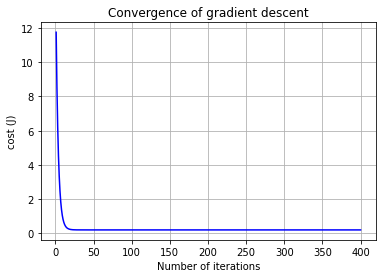

In [208]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")